<a href="https://colab.research.google.com/github/sunithaam/Python_1/blob/main/Priceprediction_realestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [372]:
df=pd.read_excel('dataset.xlsx')

In [373]:
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [374]:
df.columns

Index(['Unnamed: 0', 'Price', 'Location', 'Bedroom', 'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [376]:
df.shape

(32536, 12)

In [377]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


In [378]:
df.isna().mean().round(4) * 100

,0
Unnamed: 0,0.00
Price,0.00
Location,0.03
Bedroom,0.00
Bathroom,0.05
Carport,0.05
Land,0.01
Building,0.03
Month,0.03
City/Regency,0.03


In [379]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [380]:
df.duplicated().sum()

3

In [381]:
df.drop_duplicates(inplace=True)

In [382]:
#Grouping columns based on its type
int_columns=df.select_dtypes(include=['int']).columns
float_columns = df.select_dtypes(include=['float']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [383]:
for i in object_columns:
    print(df[i].value_counts().sort_values(ascending=False))

Location
Buah Batu         2781
Padalarang        2560
Sukasari          2000
Margaasih         1816
Antapani          1707
                  ... 
Cikalong Wetan       2
Cililin              2
Rancabali            1
Cikancung            1
Cipeundeuy           1
Name: count, Length: 66, dtype: int64
City/Regency
Bandung City            23997
Bandung Regency          5079
West Bandung Regency     3448
Name: count, dtype: int64


<Axes: xlabel='Price', ylabel='Count'>

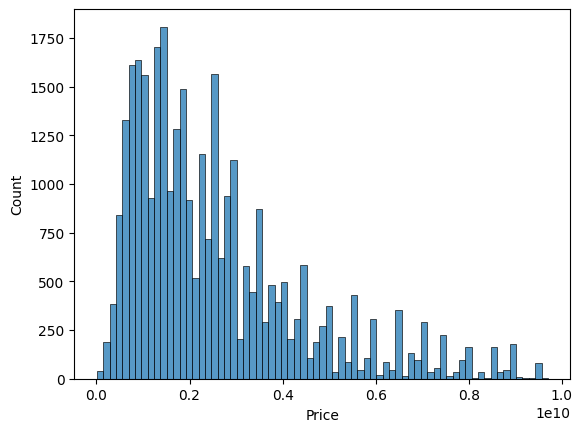

In [384]:
sns.histplot(df['Price'])

In [385]:
df['Price'].describe()

,Price
count,3.253300e+04
mean,2.554982e+09
std,1.880056e+09
min,1.020000e+07
25%,1.200000e+09
50%,2.000000e+09
75%,3.380000e+09
max,9.700000e+09


<Axes: xlabel='Location'>

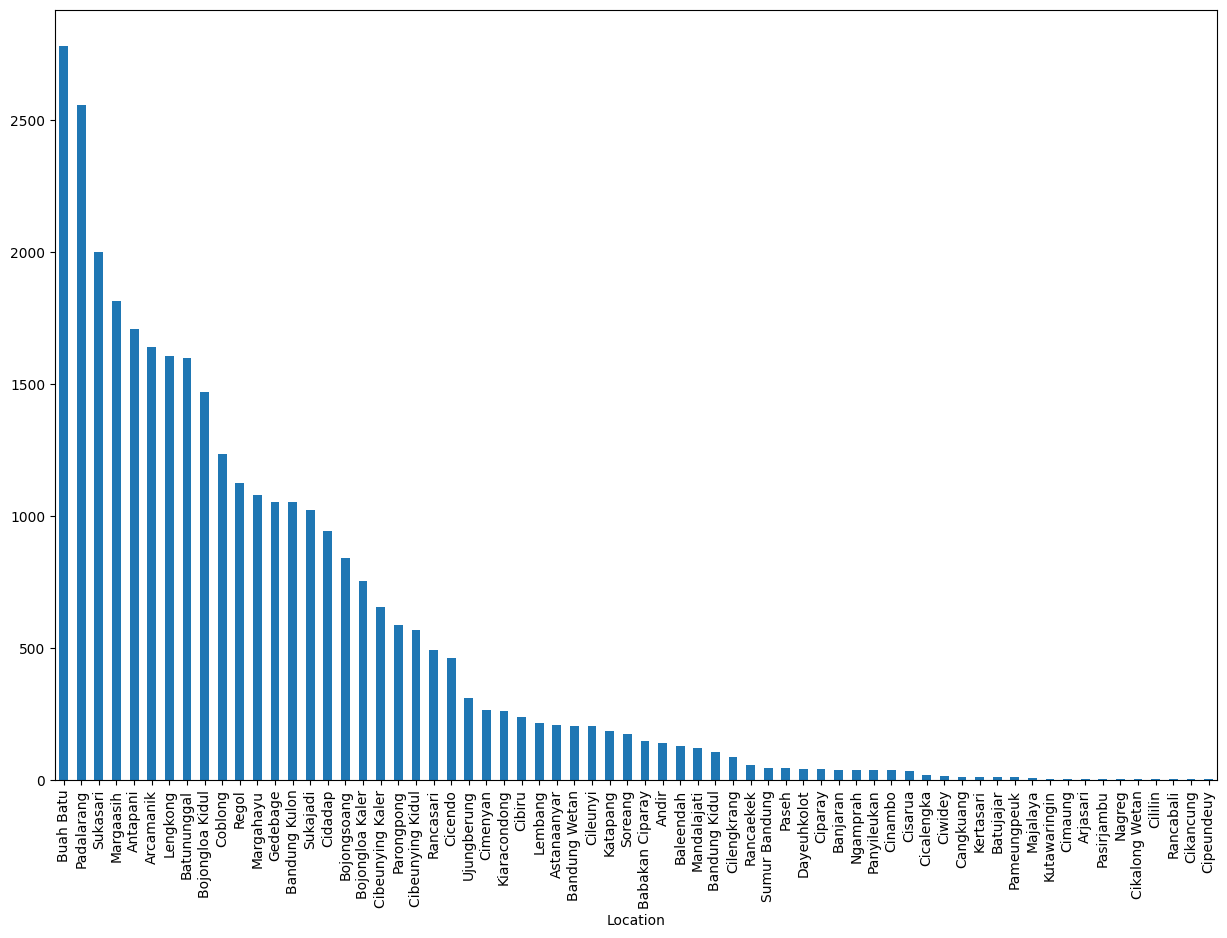

In [386]:
plt.figure(figsize=(15,10))
df['Location'].value_counts().plot(kind='bar')

<Axes: xlabel='City/Regency'>

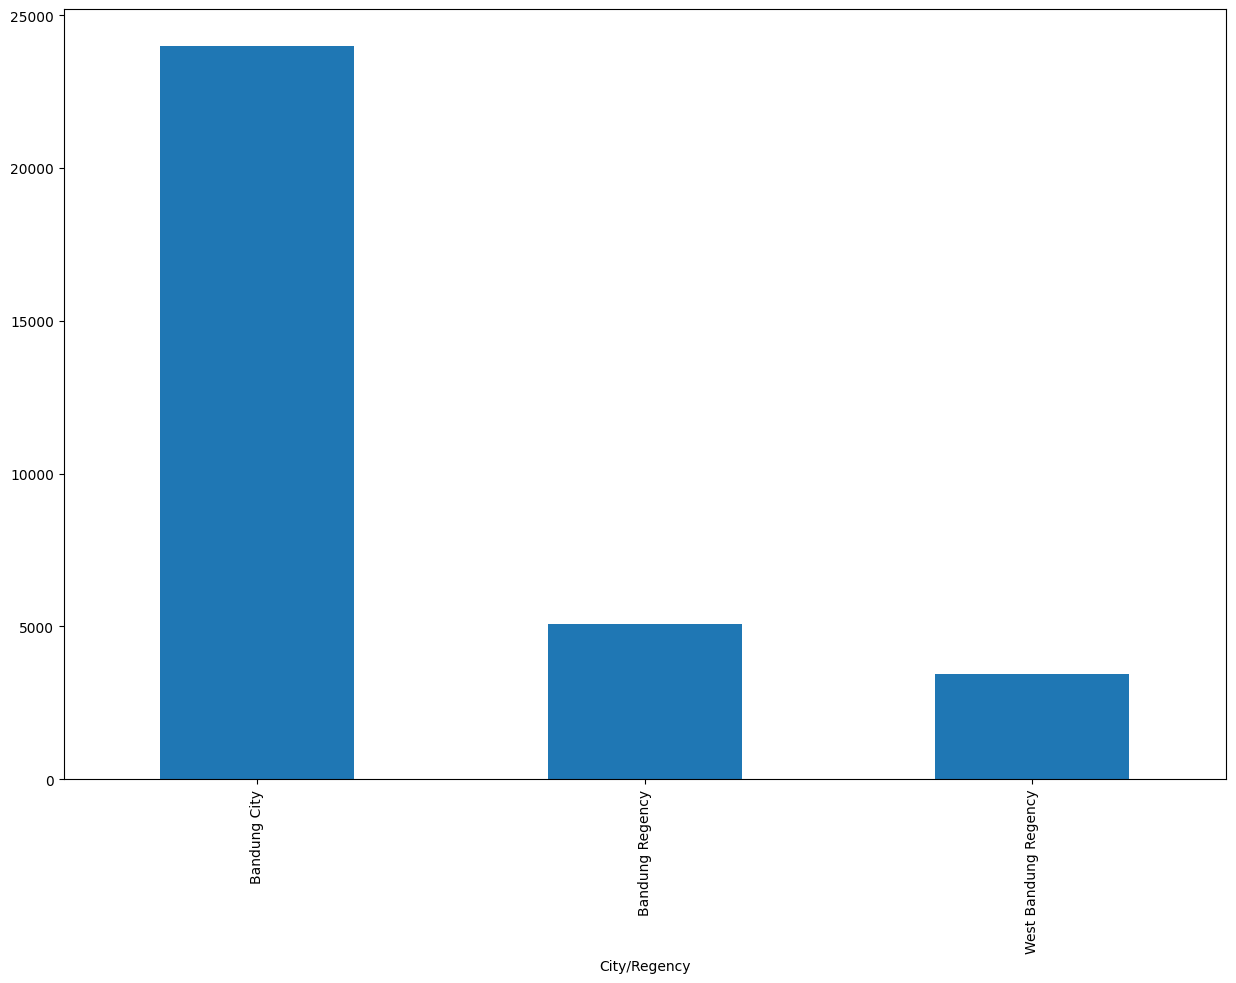

In [387]:
plt.figure(figsize=(15,10))
df['City/Regency'].value_counts().plot(kind='bar')

In [388]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
0,1.600000e+09,2,1.0,1.0,72.0,50.0,8.0,-6.843600,107.478400
1,8.500000e+08,2,1.0,1.0,70.0,80.0,8.0,-6.803228,107.581804
2,8.750000e+08,3,2.0,1.0,60.0,70.0,8.0,-6.965549,107.637926
3,1.750000e+09,2,3.0,1.0,90.0,94.0,8.0,-6.993945,107.643700
4,4.900000e+09,4,4.0,0.0,200.0,300.0,8.0,-6.947036,107.596271


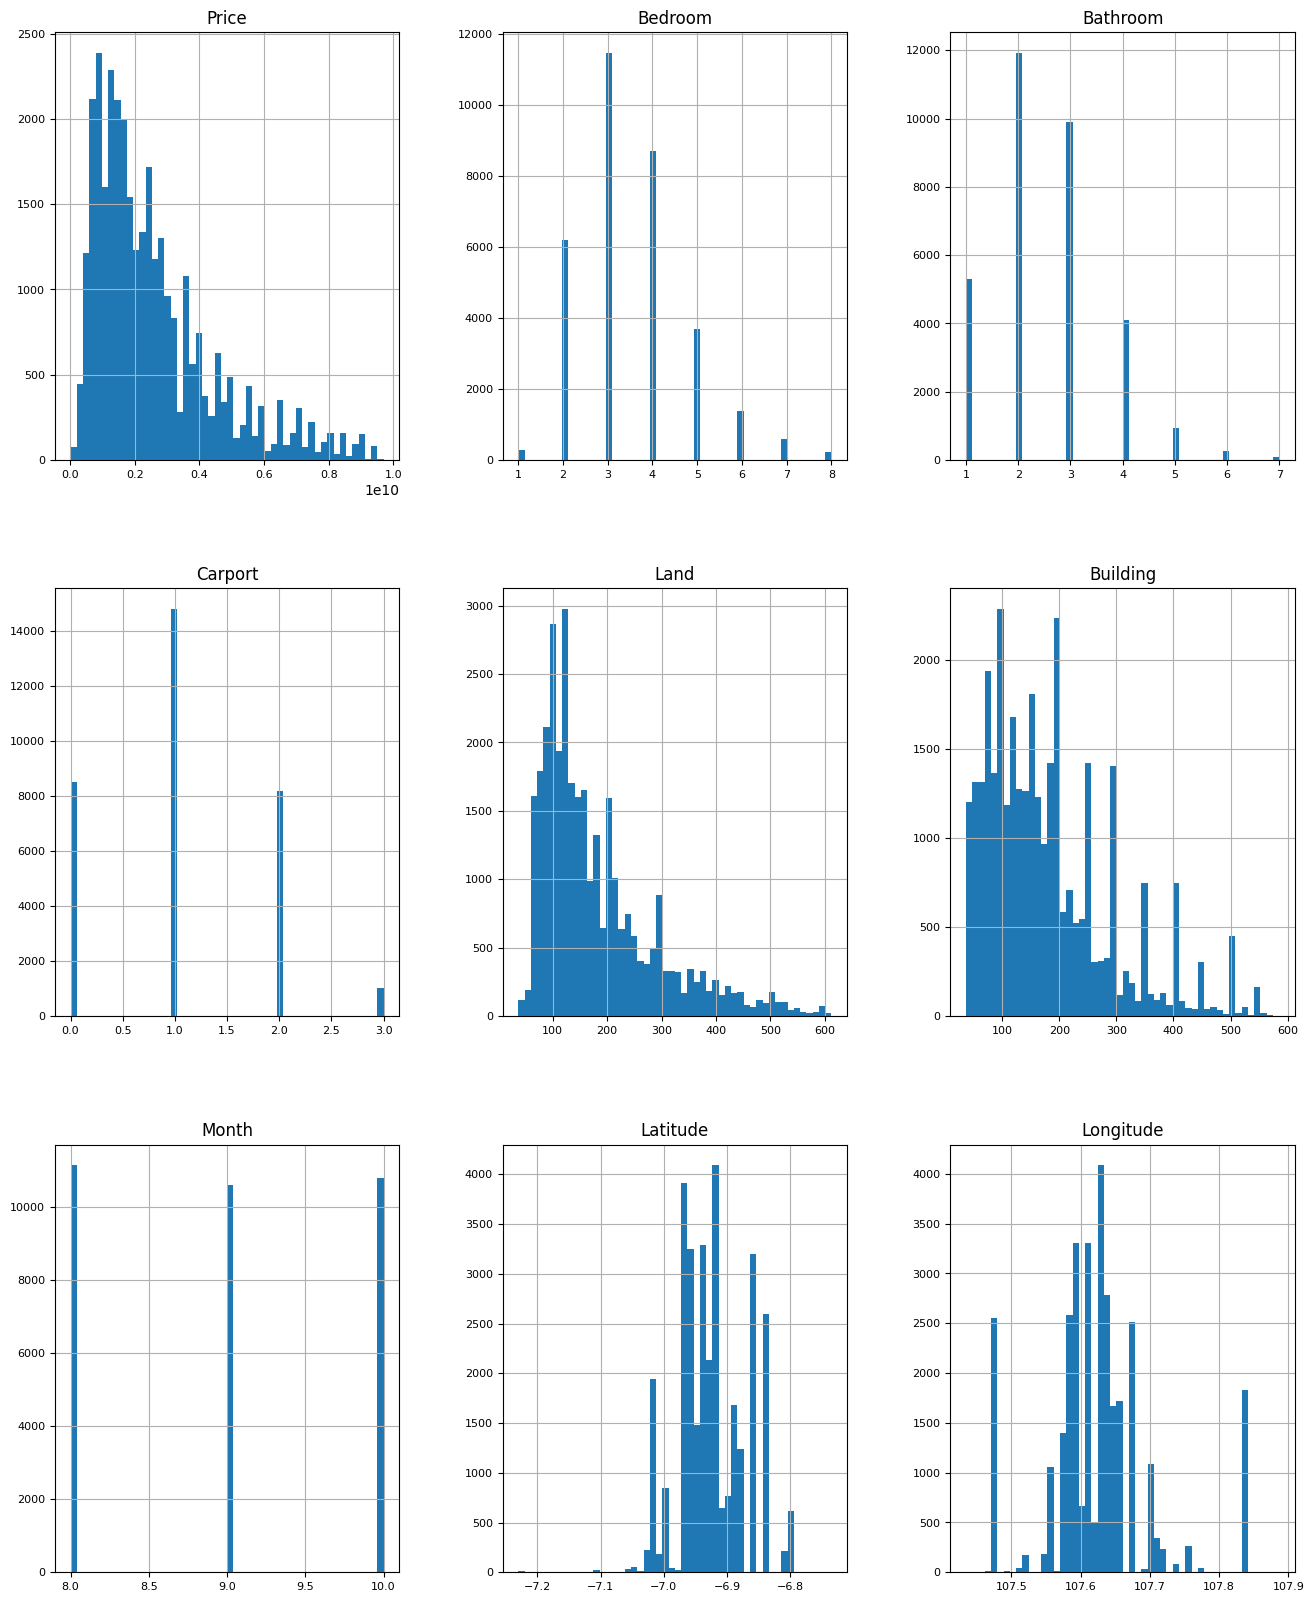

In [389]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65],
 [Text(0, 0, 'Padalarang'),
  Text(1, 0, 'Parongpong'),
  Text(2, 0, 'Buah Batu'),
  Text(3, 0, 'Bojongsoang'),
  Text(4, 0, 'Bojongloa Kidul'),
  Text(5, 0, 'Gedebage'),
  Text(6, 0, 'Lengkong'),
  Text(7, 0, 'Regol'),
  Text(8, 0, 'Bandung Kulon'),
  Text(9, 0, 'Cibeunying Kaler'),
  Text(10, 0, 'Andir'),
  Text(11, 0, 'Margahayu'),
  Text(12, 0, 'Bojongloa Kaler'),
  Text(13, 0, 'Rancasari'),
  Text(14, 0, 'Antapani'),
  Text(15, 0, 'Batununggal'),
  Text(16, 0, 'Sukasari'),
  Text(17, 0, 'Arcamanik'),
  Text(18, 0, 'Soreang'),
  Text(19, 0, 'Coblong'),
  Text(20, 0, 'Cibiru'),
  Text(21, 0, 'Sukajadi')

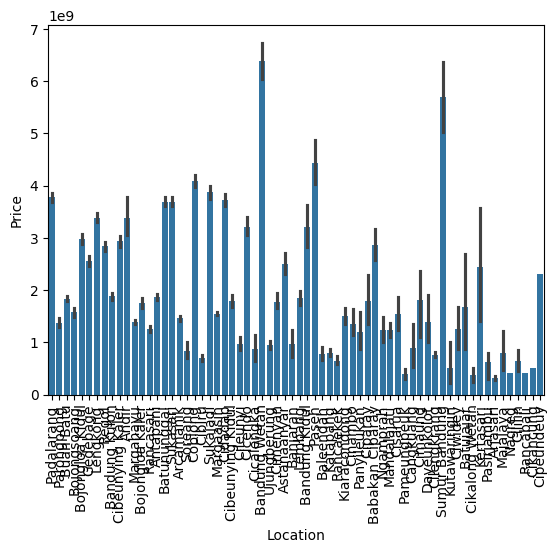

In [390]:
sns.barplot(x=df['Location'],y=df['Price'])
plt.xticks(rotation='vertical')

([0, 1, 2],
 [Text(0, 0, 'West Bandung Regency'),
  Text(1, 0, 'Bandung City'),
  Text(2, 0, 'Bandung Regency')])

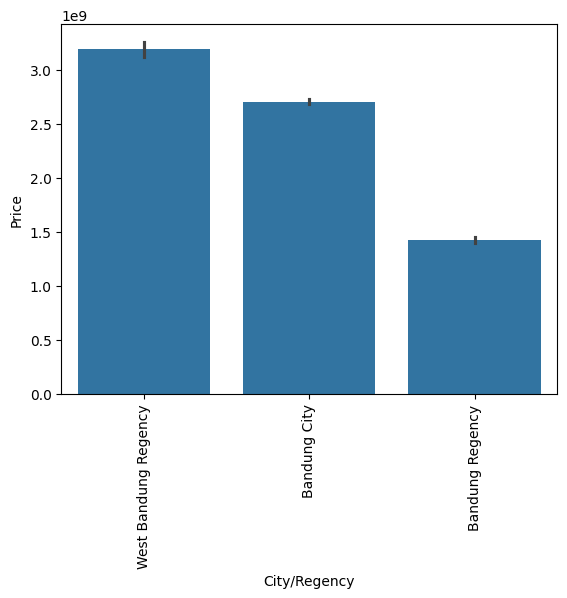

In [391]:
sns.barplot(x=df['City/Regency'],y=df['Price'])
plt.xticks(rotation='vertical')

In [392]:
df_num.corr()

,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
Price,1.000000,0.436882,0.523409,0.255849,0.773648,0.744219,0.022670,0.274707,-0.263003
Bedroom,0.436882,1.000000,0.659424,0.178615,0.469395,0.586336,0.012211,0.077050,-0.087575
Bathroom,0.523409,0.659424,1.000000,0.222043,0.463082,0.643142,0.017312,0.134644,-0.104294
Carport,0.255849,0.178615,0.222043,1.000000,0.250924,0.255957,-0.002703,0.067523,-0.049454
Land,0.773648,0.469395,0.463082,0.250924,1.000000,0.716451,0.013705,0.209461,-0.178353
Building,0.744219,0.586336,0.643142,0.255957,0.716451,1.000000,0.016300,0.160978,-0.153701
Month,0.022670,0.012211,0.017312,-0.002703,0.013705,0.016300,1.000000,0.020042,-0.010985
Latitude,0.274707,0.077050,0.134644,0.067523,0.209461,0.160978,0.020042,1.000000,-0.591101
Longitude,-0.263003,-0.087575,-0.104294,-0.049454,-0.178353,-0.153701,-0.010985,-0.591101,1.000000


<Axes: >

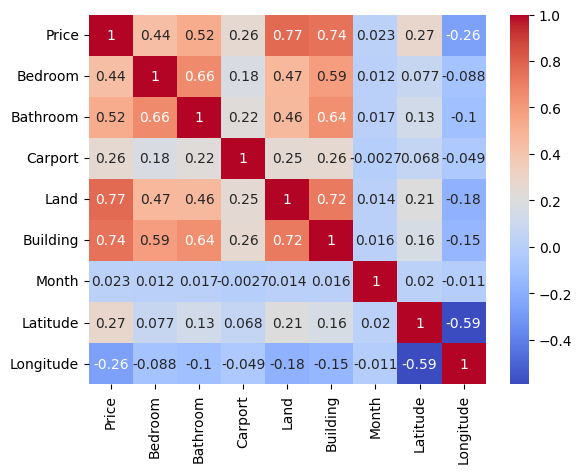

In [393]:
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

In [394]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,32533.0,2.554982e+09,1.880056e+09,1.020000e+07,1.200000e+09,2.000000e+09,3.380000e+09,9.700000e+09
Bedroom,32533.0,3.524268e+00,1.235939e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
Bathroom,32518.0,2.527769e+00,1.074327e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
Carport,32518.0,1.052125e+00,7.970300e-01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
Land,32530.0,1.813970e+02,1.074943e+02,3.700000e+01,1.050000e+02,1.470000e+02,2.250000e+02,6.120000e+02
Building,32524.0,1.794016e+02,1.085182e+02,3.700000e+01,1.000000e+02,1.500000e+02,2.350000e+02,5.850000e+02
Month,32524.0,8.988624e+00,8.209992e-01,8.000000e+00,8.000000e+00,9.000000e+00,1.000000e+01,1.000000e+01
Latitude,32523.0,-6.923487e+00,5.106132e-02,-7.230321e+00,-6.952981e+00,-6.931934e+00,-6.886334e+00,-6.734761e+00
Longitude,32524.0,1.076259e+02,7.569473e-02,1.074348e+02,1.075907e+02,1.076262e+02,1.076599e+02,1.078866e+02


In [395]:
# Calculate IQR for numerical columns
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df_num < lower_bound) | (df_num > upper_bound)).sum()
print(outliers)

Price        1696
Bedroom      2491
Bathroom     1306
Carport         0
Land         1728
Building     1174
Month           0
Latitude       75
Longitude    4457
dtype: int64


<Axes: >

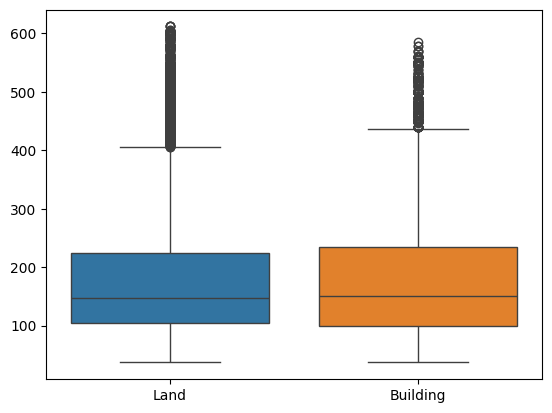

In [396]:
# We can ignore discrete columns
outlier_columns=['Land','Building']
sns.boxplot(data=df_num[outlier_columns])

**Preprocessing**

Handling missing values

Since number of missing values constitute only less percentage as seen in EDA,we can impute missing vaues with median for numerical columns and mode for categorical columns

In [397]:
null_columns = df.columns[df.isnull().any()]
null_columns


Index(['Location', 'Bathroom', 'Carport', 'Land', 'Building', 'Month',
       'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [398]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Carport'].fillna(df['Carport'].mode()[0], inplace=True)
df['Month'].fillna(df['Month'].mode()[0], inplace=True)
df['City/Regency'].fillna(df['City/Regency'].mode()[0], inplace=True)

<ipython-input-398-394909abeda1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0], inplace=True)
<ipython-input-398-394909abeda1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [399]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['Land', 'Building', 'Latitude', 'Longitude'], dtype='object')

In [400]:
df.isnull().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,3
Building,9
Month,0
City/Regency,0
Latitude,10


In [401]:
from sklearn.impute import SimpleImputer
null_columns = df.columns[df.isnull().any()]
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer=imp_median.fit(df[null_columns])
df_imp=imputer.transform(df[null_columns])
df_imp=pd.DataFrame(df_imp)
df_imp.columns=['Land','Building','Latitude','Longitude']
df[null_columns]=df_imp[null_columns]

In [402]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


Handling outliers

<Axes: >

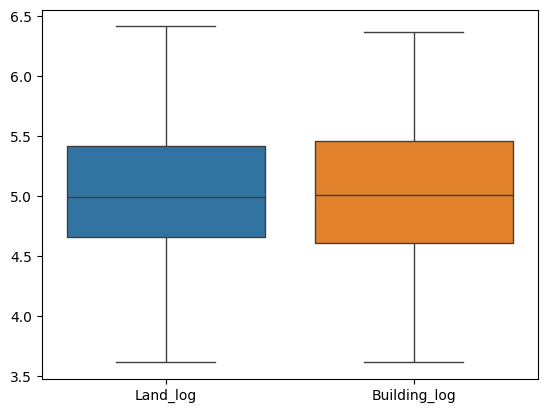

In [403]:
# Outliers in discrete columns can be discraded
# Consider outliers for Land and building only
#Apply log transformation to these columns
df['Land_log']=np.log(df['Land'])
df['Building_log']=np.log(df['Building'])
sns.boxplot(data=df[['Land_log','Building_log']])

In [404]:
#Drop original land and building columns after taking log transformation of these columns
df.drop(['Land','Building'],axis=1,inplace=True)

In [405]:
#Encoding
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ['Location','City/Regency'] # Fixed typo here

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the selected columns of the DataFrame
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame with appropriate column names
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns) # Convert to dense array

# Concatenate the encoded columns with the original dataset (dropping the original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Show the first few rows of the transformed dataset
df_encoded.head()

,Price,Bedroom,Bathroom,Carport,Month,Latitude,Longitude,Land_log,Building_log,Location_Andir,...,Location_Rancasari,Location_Regol,Location_Soreang,Location_Sukajadi,Location_Sukasari,Location_Sumur Bandung,Location_Ujungberung,City/Regency_Bandung City,City/Regency_Bandung Regency,City/Regency_West Bandung Regency
0,1.600000e+09,2.0,1.0,1.0,8.0,-6.843600,107.478400,4.276666,3.912023,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8.500000e+08,2.0,1.0,1.0,8.0,-6.803228,107.581804,4.248495,4.382027,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8.750000e+08,3.0,2.0,1.0,8.0,-6.965549,107.637926,4.094345,4.248495,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.750000e+09,2.0,3.0,1.0,8.0,-6.993945,107.643700,4.499810,4.543295,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.900000e+09,4.0,4.0,0.0,8.0,-6.947036,107.596271,5.298317,5.703782,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Encoding categorical variables

In [406]:
df_encoded.shape

(32533, 78)

In [407]:
df_encoded.dropna(inplace=True)

Defining feature(x) and label (y)

In [408]:
x=df_encoded.drop('Price',axis=1)
y=df_encoded['Price']

Splitting data in to training,validation and test data

In [409]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [297]:
x_train.columns

Index(['Bedroom', 'Bathroom', 'Carport', 'Month', 'Latitude', 'Longitude',
       'Land_log', 'Building_log', 'Location_Andir', 'Location_Antapani',
       'Location_Arcamanik', 'Location_Arjasari', 'Location_Astanaanyar',
       'Location_Babakan Ciparay', 'Location_Baleendah',
       'Location_Bandung Kidul', 'Location_Bandung Kulon',
       'Location_Bandung Wetan', 'Location_Banjaran', 'Location_Batujajar',
       'Location_Batununggal', 'Location_Bojongloa Kaler',
       'Location_Bojongloa Kidul', 'Location_Bojongsoang',
       'Location_Buah Batu', 'Location_Cangkuang', 'Location_Cibeunying Kaler',
       'Location_Cibeunying Kidul', 'Location_Cibiru', 'Location_Cicalengka',
       'Location_Cicendo', 'Location_Cidadap', 'Location_Cikalong Wetan',
       'Location_Cikancung', 'Location_Cilengkrang', 'Location_Cileunyi',
       'Location_Cililin', 'Location_Cimaung', 'Location_Cimenyan',
       'Location_Cinambo', 'Location_Ciparay', 'Location_Cipeundeuy',
       'Location_Cisaru

In [411]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']]=sc.fit_transform(x_train[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']])
x_val[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']]=sc.transform(x_val[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']])
x_test[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']]=sc.transform(x_test[['Bedroom','Bathroom','Carport','Month','Latitude','Longitude','Land_log','Building_log']])

Feature selection

In [412]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
k_best_mi = SelectKBest(score_func=mutual_info_regression, k=10)
X_mi = k_best_mi.fit_transform(x_train, y_train)
print("List of Selected Features:", k_best_mi.get_support(indices=True))
x_train.columns[k_best_mi.get_support(indices=True)]

List of Selected Features: [ 0  1  2  4  5  6  7 35 66 76]


Index(['Bedroom', 'Bathroom', 'Carport', 'Latitude', 'Longitude', 'Land_log',
       'Building_log', 'Location_Cileunyi', 'Location_Rancaekek',
       'City/Regency_West Bandung Regency'],
      dtype='object')

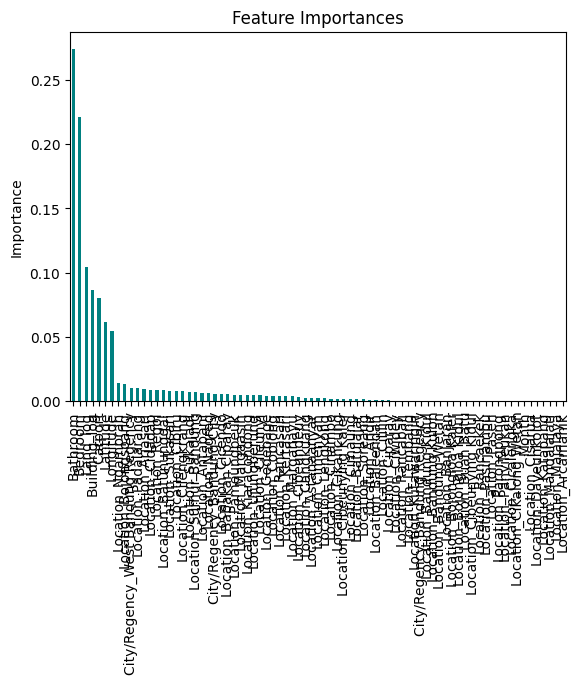

<Figure size 2000x1500 with 0 Axes>

In [413]:
#information gain
from sklearn.feature_selection import mutual_info_regression
importances = mutual_info_regression(x_train, y_train)
feat_importances = pd.Series(importances, x_train.columns)
feat_importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.figure(figsize=(20,15))

plt.show()

In [414]:
feat_importances.sort_values(ascending=False)

,0
Bathroom,0.273750
Bedroom,0.221286
Land_log,0.104352
Building_log,0.086640
Carport,0.080545
...,...
Location_Dayeuhkolot,0.000000
Location_Katapang,0.000000
Location_Mandalajati,0.000000
Location_Majalaya,0.000000


In [415]:
x_train=x_train[['Bedroom', 'Bathroom', 'Carport', 'Month', 'Latitude', 'Longitude','Land_log','Building_log']]
x_test=x_test[['Bedroom', 'Bathroom', 'Carport', 'Month', 'Latitude', 'Longitude','Land_log','Building_log']]
x_val=x_val[['Bedroom', 'Bathroom', 'Carport', 'Month', 'Latitude', 'Longitude','Land_log','Building_log']]

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [417]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [418]:
r2 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.33269692048778665


In [419]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 2.58192198e+08  7.16499860e+08  2.41559216e+08  1.18733002e+07
  4.51542761e+07 -5.92777159e+07  2.73776052e+08 -1.69396187e+07]
Intercept: 2546833738.1345725


In [421]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)


In [422]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

R2 score: 0.33269692048334265
Coefficients: [ 2.58192198e+08  7.16499860e+08  2.41559216e+08  1.18733001e+07
  4.51542760e+07 -5.92777158e+07  2.73776052e+08 -1.69396182e+07]
Intercept: 2546833738.1345725


In [423]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [424]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)

R2 score: 0.33269639690241404
Coefficients: [ 2.58207131e+08  7.16461865e+08  2.41555808e+08  1.18733473e+07
  4.51559980e+07 -5.92760627e+07  2.73749014e+08 -1.69129401e+07]
Intercept: 2546833738.1345725


From the analysis done on the dataset following features found to be more effect on price prediction.Bathroom,Bedroom,Carport,Latitude,Longitude,Land and Building
Bandung city found to have ore price than Bandung regency